In this article, We are going to tackle the famous Monty Hall problem and try to figure out various ways to solve it. Specifically, we are going to:

1. [Solve the problem intutively](#Solution-by-Intuition)
2. [Solve the problem by brute force using simulations](#Solution-by-Simulation-in-Python)
3. [Solve the problem using probability trees](#Solution-by-Probability-Trees)
4. [Solve the problem using Bayes Thereom](#Solution-by-Bayes'-Thereom)

### Problem Statement

<div style="text-align:center">
<img src = images/monty-hall/cover.png
alt="cover_image"/>
</div>

We are given three doors, one of the doors has a car in it. The other two doors have goats behind them. We are asked to choose one of these doors. After that, Monty opens a door to reveal a goat and never the car. We are left with two doors closed. Monty offers us a chance to switch between the originally chosen door and the remaining closed door.

Should we change doors?

### Solution by Intuition

To make things more clear, here are the rules:

+ Monty must open a door that was not picked by the player.
+ Monty must open a door to reveal a goat and never the car.
+ Monty must offer the chance to switch between the originally chosen door and the remaining closed door.

Suppose we have 100 doors instead. We pick one door and Monty opens 98 doors with goats in them. We are now left with two doors. Our initial guess has a probability of 1/100 to be correct. The other door has a proability of 99/100 to be correct. Therefore, you should switch doors.

The same applies to three doors scenerio. The probability of guessing the <b>correctly</b> on the first try is 1/3. The probability of guessing <b>incorrectly</b> on the first try is 2/3. Therefore, you should switch doors.

### Solution by Simulation in Python

Still not convinced? Below, I've written a for loop that simulates 10,000 games, counting the number of times the Player wins if he/she switched doors.

In [1]:
import random as random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

winrate_stay = []
winrate_change = []
wins_stay = 0
wins_change = 0
random.seed(0)
for i in range(10000):
    #Initialize cars/goats setup
    doors = ['Car', 'Goat_1', 'Goat_2']
    random.shuffle(doors)
    
    #Player makes a guess
    first_guess = random.choice(doors)
    
    #Monty opens a door
    if first_guess == 'Goat_2':
        monty_opens = 'Goat_1'
    elif first_guess == 'Goat_1':
        monty_opens = 'Goat_2'
    else:
        monty_opens = random.choice(['Goat_1', 'Goat_2'])                                   
        #Adds one wins if Player stays with the first choice
        wins_stay += 1
    
    #Switch doors
    second_guess = doors
    second_guess.remove(monty_opens)
    second_guess.remove(first_guess)
    
    #Adds one win if player stays with the second choice                             
    if second_guess == ['Car']:
        wins_change += 1
        
    winrate_stay.append(wins_stay*100/(i+1))
    winrate_change.append(wins_change*100/(i+1))
    
print('Win rate (don\'t change): {} %'.format(wins_stay/100))
print('Win rate (changed doors): {} %'.format(wins_change/100))

Win rate (don't change): 33.13 %
Win rate (changed doors): 66.87 %


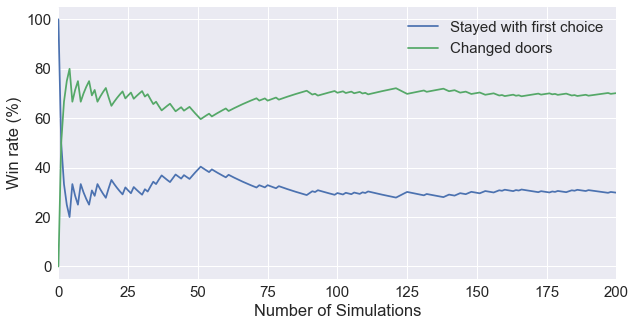

In [2]:
fig = plt.figure(figsize=(10,5))
ax = plt.plot(winrate_stay, label='Stayed with first choice')
ax = plt.plot(winrate_change, label='Changed doors')

plt.xlim(0,200)
plt.xlabel('Number of Simulations')
plt.ylabel('Win rate (%)')
plt.legend()
plt.show()

From our simulation of 10,000 games, we see our win rate jumps up to 66% if we switch doors. 

### Solution by Probability Trees

So what is the theory behind it? We can describe this problem with a probability tree.


<div style="text-align:center">
<img src = images/monty-hall/probability_tree.png
alt="probability_tree"/>
</div>

From this probability tree, we can sum up the probability of every possible event that results in us winning if we always switched doors.

$$ 3*\Bigl(\frac{1}{3}*\frac{1}{3}*1*1 + \frac{1}{3}*\frac{1}{3}*1*1\Bigl) = \frac{2} {3}$$

We can also sum up the probability of every possible event that results in us losing if we always switched doors.

$$ 3*\Bigl(\frac{1}{3}*\frac{1}{3}*\frac{1}{2}*1 + \frac{1}{3}*\frac{1}{3}*\frac{1}{2}*1\Bigl) = \frac{1} {3}$$




### Solution by Bayes' Thereom 

When Monty opens a door, we are getting new information about the problem. Bayes' thereom uses that information and updates our probabilities. Let's start with some definitions:

$$ P(A|B) = \frac{P(B|A) * P(A)} {P(B)} $$

And,

+ C1: Car is behind door 1
+ C2: Car is behind door 2
+ C3: Car is behind door 3
+ M1: Monty opens door 1
+ M2: Monty opens door 2
+ M3: Monty opens door 3

If we follow our probability decision tree, there are quite a lot of scenerios that could happen. For simplicity, let's assume we pick door 1 as our first guess, and Monty opens door 3. In this case,

$$ P(C1|M3) = \frac{P(M3|C1)*P(C1)} {P(M3)} $$

$P(C1)$ is the probability of finding a car behind door 1 given no other information, this is simply 1/3.

$P(M3)$ is the probability of Monty opening door 3. This probability is 1/2 because Monty can not choose the door we picked.

$P(M3|C1)$ is the probability of Monty opening door 3 given that the car is behind door 1. If the car is truly behind door 1, then Monty can pick one out of the two remaining doors to open. This value is also 1/2.

$$ P(C1|M3) = \frac{1/2*1/3} {1/2} = 1/3 $$

According to Bayes' Thereom, the probability of finding the car behind door 1 given that Monty opens door 3 is 1/3. Let's see what happens if we change our guess from door 1 to door 2.


$$ P(C2|M3) = \frac{P(M3|C2)*P(C2)} {P(M3)} $$

$P(C2)$ is the probability of finding a car behind door 2 given no other information, this is simply 1/3.

$P(M3)$ is the probability of Monty opening door 3. The probability is 1/2 because Monty can not choose the door we picked.

$P(M3|C2)$ is the probability of Monty opening door 3 given that the car is behind door 2. If the car is truly behind door 2, and we picked door 1 as our first guess, Monty has to open door 3. The probability is 1.

$$ P(C2|M3) = \frac{1*1/3} {1/2} = 2/3 $$

---

The files used for this article can be found in my [GitHub repository](https://github.com/sengkchu/codingdisciple.content/tree/master/Learning%20data%20science/Learning/Monty%20Hall%20Problem).